In [1]:
cd ..

/home/mescalin/htyao/Projects/VIECPLX


/home/mescalin/htyao/micromamba/envs/parnassus/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [13]:
from src.foldingAlg import Final_list, ViennaFold, BestHelixFoldRNAFold, BasicCoFold

In [4]:
import warnings
 
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [5]:
foldingNames = [x.name for x in Final_list]
print(*foldingNames, sep=', ')

RNAfold, Look behind fold, Basic cofold, Best helix cofold with RNAfold in second step, Folding rule, Beam search


In [6]:
df = pd.read_csv(Path('result/sds/sds_all.csv'), sep='\t')
df

,seq,str,bpcount,treecount,label
0,0,0,0.0,0.0,RNAfold
1,0,1,0.0,0.0,RNAfold
2,0,2,0.0,0.0,RNAfold
3,0,3,0.0,0.0,RNAfold
4,0,4,0.0,0.0,RNAfold
...,...,...,...,...,...
162403,100,196,0.0,0.0,Beam search
162404,100,197,0.0,0.0,Beam search
162405,100,198,0.0,0.0,Beam search
162406,100,199,0.0,0.0,Beam search


Plot each SDS compared with RNAfold

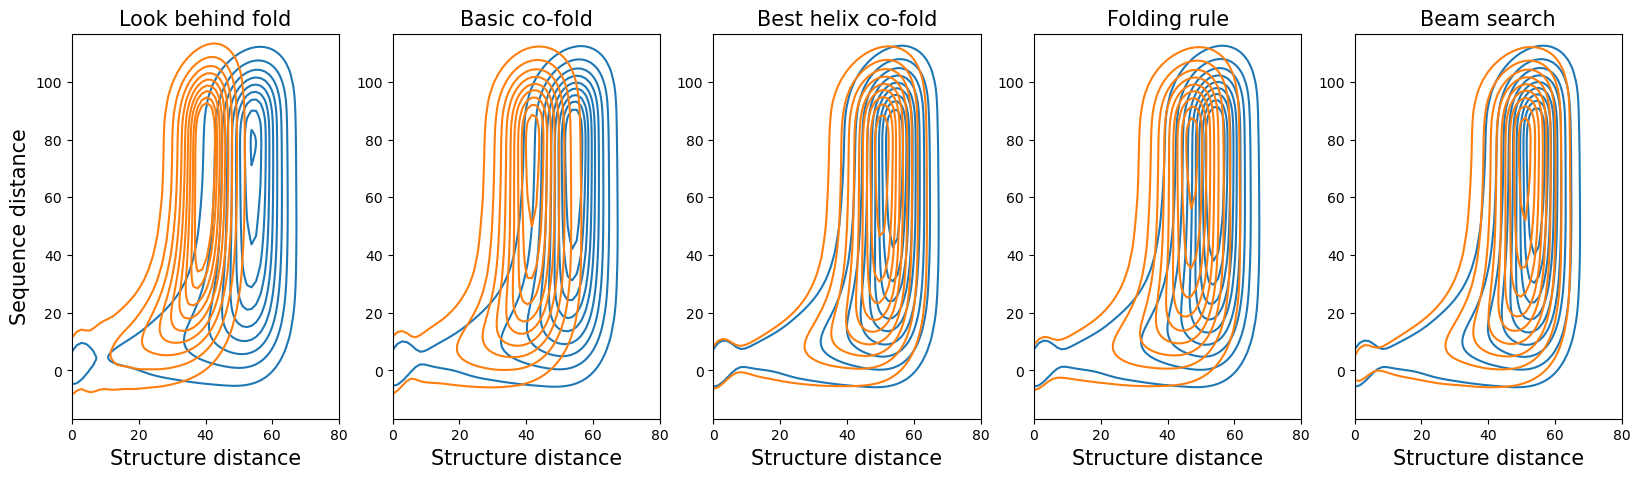

In [14]:
count = 'bpcount'
# count = 'treecount'
to_plot_folding = [x.name for x in Final_list[1:]]
l = len(to_plot_folding)
# w = (l+1)//2
maxdist = (np.max(df.loc[df[count]>0, 'str']) // 10 + 1)*10
fig, axs = plt.subplots(1, l, figsize=(20,5))
for i, folding in enumerate(to_plot_folding):
    ax = fig.axes[i]
    allDf = df[df['label'].isin([ViennaFold.name, folding])]
    strlim = max(allDf['str'])
    g = sns.kdeplot(data=allDf, x='str', y='seq', hue='label', ax=ax, weights=count)
    ax.set_xlabel('Structure distance', fontsize=15)
    if i == 0:
        ax.set_ylabel('Sequence distance', fontsize=15)
    else:
        ax.set(ylabel=None)
    ax.set_xlim(0, maxdist)
    if folding == BestHelixFoldRNAFold.name:
        ax.set_title("Best helix co-fold", fontsize=15)
    elif folding == BasicCoFold.name:
        ax.set_title("Basic co-fold", fontsize=15)
    else:
        ax.set_title(folding, fontsize=15)
    ax.get_legend().remove()
plt.savefig('doc/fig/sds_bpdist.pdf', dpi=200, bbox_inches='tight')